Import the sklearn datasets
use the iris data
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ====

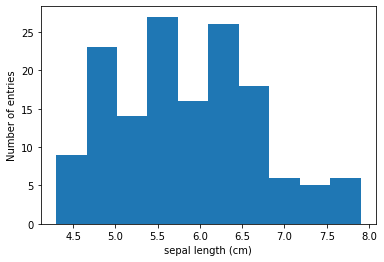

Working on feature sepal width (cm)


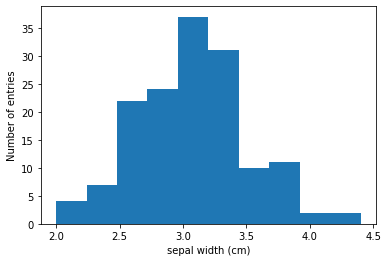

Working on feature petal length (cm)


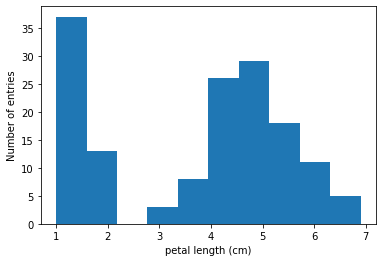

Working on feature petal width (cm)


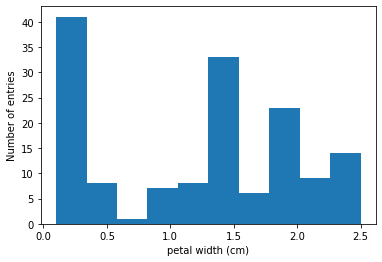

Working on the target values


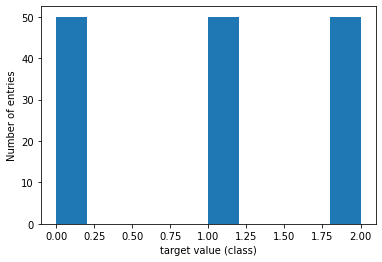

In [5]:
"""
The data sets wer are using come from sklearn.  We need matplotlib for plotting out scatter plots and histograms,
and we will be using numpy to compute covaraince and correlation matrices. So all three are imported at the
start of this notebook.
"""
print("Import the sklearn datasets")
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import numpy as np

"""
The Iris data is to be used for the default study. 
"""

print("use the iris data")
Bunch = ds.load_iris(return_X_y=False) # we want to get the Bunch so that we can access more than just the data and target values
target_name = "class"
target_plot_xaxis = "target value (class)"


# Print the description of the data
print(Bunch.DESCR)


i=0
for this_feature in Bunch.feature_names:
    print("Working on feature", this_feature)
    plt.hist(Bunch.data[:,i], 10)
    plt.xlabel(this_feature)
    plt.ylabel("Number of entries")
    plt.show()
    i+=1   # increment the counter to acces the next feature

print("Working on the target values")
plt.hist(Bunch.target, 10)
plt.xlabel(target_plot_xaxis) # use the value set above when selecting the data set
plt.ylabel("Number of entries")
plt.show()

In [6]:
"""
Compute the mean and standard deviation of the data set, formatted to a certain
number of decimal places. Note that some data sets will have this information 
as a part of the description printed out as a result of runnign the previous code
cell
"""
print("-------------------------------------------------------------")
print("Variable       \t        Average \t St Dev ")
print("-------------------------------------------------------------")
print("git test")       
for i in range(len(Bunch.feature_names)):
    print("{0:15s} \t {1:5.3f}    \t {2:5.3f}".format(Bunch.feature_names[i], np.average(Bunch.data[:,i]), np.std(Bunch.data[:,i])))
print("{0:15s} \t {1:5.3f}    \t {2:5.3f}".format(target_name, np.average(Bunch.target), np.std(Bunch.target)))

print("-------------------------------------------------------------")


"""
Covariance Matrix computation
Note that the sklearn data samples
use rows for examples and columns for features. The default numpy correlation calculation
is to use rows for features and columns for examples; so we have to set rowvar=False to
reverse that default ordering to get the correct matrix.
"""
cov_matrix = np.cov(Bunch.data, rowvar=False)
print("\nThe covariance matrix for these data is:\n")
print(cov_matrix)

"""
Correlation Matrix computation
"""
corr_matrix = np.corrcoef(Bunch.data, rowvar=False)
print("\nThe correlation matrix for these data is:\n")
print(corr_matrix)
print("test")

-------------------------------------------------------------
Variable       	        Average 	 St Dev 
-------------------------------------------------------------
sepal length (cm) 	 5.843    	 0.825
sepal width (cm) 	 3.057    	 0.434
petal length (cm) 	 3.758    	 1.759
petal width (cm) 	 1.199    	 0.760
class           	 1.000    	 0.816
-------------------------------------------------------------

The covariance matrix for these data is:

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

The correlation matrix for these data is:

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


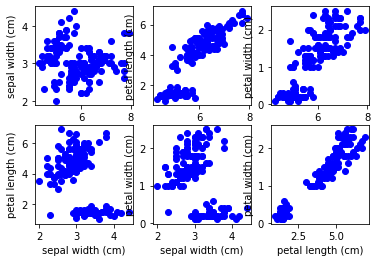

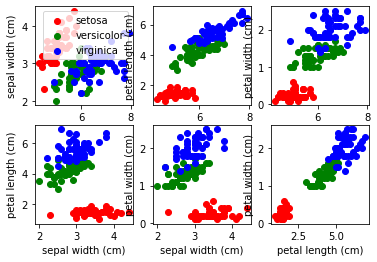

In [7]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import numpy as np

Bunch = ds.load_iris(return_X_y=False)
features = Bunch['data']
feature_names = Bunch['feature_names']
target = Bunch['target']
#4 attributed for each class, 600 data points in data, (150, 4)

#Part1
#scatter plot, each target_names represents a different flower species, from which 6 scatter plots need to be plotted

# Four columns, plot two at a time.  We'll need the indices of the cols we're pairing.
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
for i,(x,y) in enumerate(pairs):
    plt.subplot(2,3,i+1)

    for cls in zip(range(3)):
        plt.scatter(features[target == cls,x], features[target == cls,y], c='blue')
    plt.xlabel(feature_names[x])
    plt.ylabel(feature_names[y])
plt.show()

#Part2
#add a legend
colors  = "rgb"
species = []
for names in Bunch.target_names:
    species.append(names)

j = 0
pairs = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
for i,(x,y) in enumerate(pairs):
    # 6 subplots in 2x3 configuration. Each subplot pairs two iris
    # attributes we call x and y. Let's do subplot i+1 now.
    plt.subplot(2,3,i+1)
    # On this subplot we're doing 3 sets of points, each belonging to a different iris class
    # with a different color and shape used to draw the points.  To do the 3 sets, use a loop.
    # To loop through 3 sequences at once, zip them together first
    for cls, clr, lbl in zip(range(3), colors, species):
        plt.scatter(features[target == cls,x], features[target == cls,y], c= clr, label = lbl)
        if(i == 0):
            plt.legend()
    plt.xlabel(feature_names[x])
    plt.ylabel(feature_names[y])

plt.show()
